epsg:4326


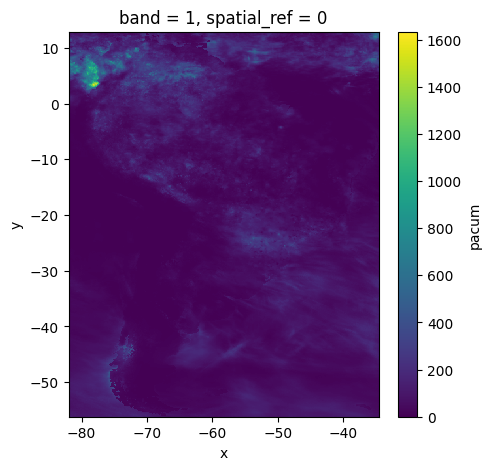

In [67]:
import geopandas as gpd
import xarray as xr
import rioxarray as xrio
import contextily as cx

# get the world from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.crs)

# get rain from INPE
# !curl -O http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/MERGE_CPTEC_acum_sep_2022.nc
rain = xr.open_dataset('./MERGE_CPTEC_acum_sep_2022.nc')['pacum'].squeeze()

# set the CRS as the same from the world (EPSG:4326)
rain = rain.rio.write_crs(world.crs)

# save Rain as geotiff to be used in Contextily
rain = rain.rename({'lat': 'y', 'lon': 'x'})
rain.rio.to_raster('./rain.tif', compress='deflate')

# Open the rain as tiff just for checking
rain_tif = xrio.open_rasterio('./rain.tif')
rain_tif.plot(aspect='equal', figsize=(5, 5))

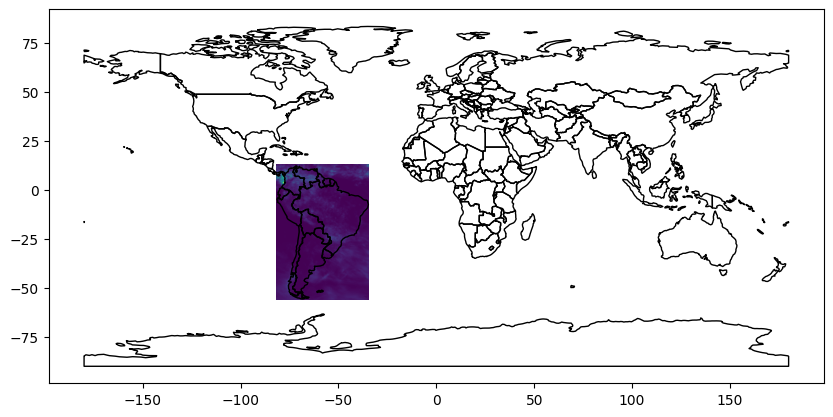

In [58]:
ax = world.plot(facecolor='none', figsize=(10, 7))
cx.add_basemap(ax=ax, source='./rain.tif', reset_extent=False)

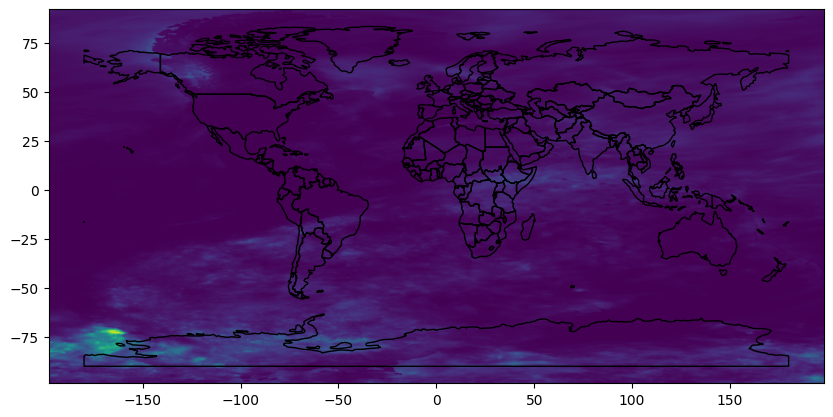

In [59]:
rain.rio.to_raster('./rain.tif', compress='deflate')
ax = world.plot(facecolor='none', figsize=(10, 7))

cx.add_basemap(ax=ax, source='./rain.tif', reset_extent=True)

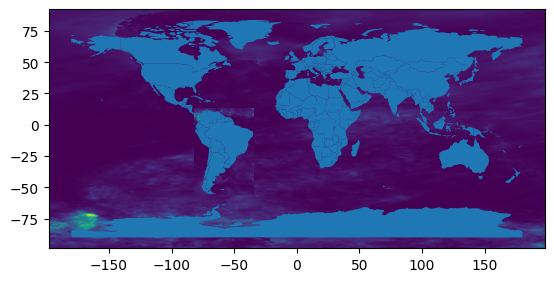

In [54]:
ax.figure

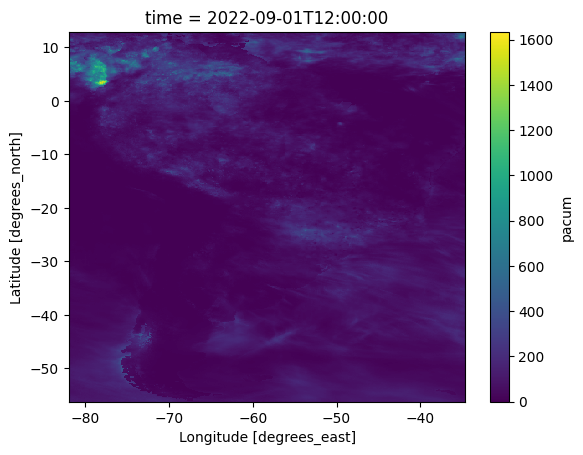

In [24]:
rain['pacum'].plot()